In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [2]:
# get dataset
train = h5py.File('/Users/leo/Google 드라이브/Programming/deep_learning/deep-learning-sepcialization/assignments/Neural Networks and Deep Learning/Week 2/Logistic Regression as a Neural Network/datasets/train_catvnoncat.h5', 'r')
test = h5py.File('/Users/leo/Google 드라이브/Programming/deep_learning/deep-learning-sepcialization/assignments/Neural Networks and Deep Learning/Week 2/Logistic Regression as a Neural Network/datasets/test_catvnoncat.h5', 'r')

In [3]:
print(train.keys())
print(test.keys())
print(list(test['list_classes']))

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>
[b'non-cat', b'cat']


In [4]:
# load dataset
x_train, y_train, x_test, y_test, classes = train['train_set_x'], train['train_set_y'], test['test_set_x'], test['test_set_y'], list(test['list_classes'])

In [5]:
print(f'x_train.shape: {x_train.shape}')
print(f'y_train.shape: {y_train.shape}')

x_train.shape: (209, 64, 64, 3)
y_train.shape: (209,)


This image is b'cat' image


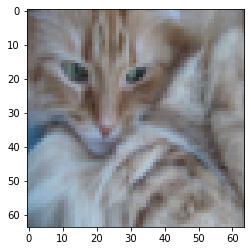

In [6]:
# preview datasets
idx = 2
plt.imshow(x_train[idx])
print(f'This image is {classes[y_train[idx]]} image')

In [7]:
# flatten x and normalize
x_train = x_train[:].reshape((x_train.shape[0], -1)).T / 255.
y_train = y_train[:].reshape((1, y_train.shape[0]))
x_test = x_test[:].reshape((x_test.shape[0], -1)).T / 255.
y_test = y_test[:].reshape((1, y_test.shape[0]))

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


In [8]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [9]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

In [10]:
# forward prop + back prop
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # forward prop
    # loss -> y * log(y_hat) + (1 - y) * log(1 - y_hat)
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    # backward prop
    dw = 1 / m * np.dot(X, (A - Y).T)
    db = 1 / m * np.sum(A - Y)
    
    grads = {"dw": dw, "db": db}
    return grads, cost

In [11]:
# gradient descent
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f'Cost of {i}th iteration: {cost}') 
        
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}

    return params, grads, costs    

In [12]:
def predict(w, b, X):
    A = np.dot(w.T, X) + b
    return A >= 0.5

In [13]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w, b = params["w"], params["b"]
    
    prediction_train = predict(w, b, X_train)
    prediction_test = predict(w, b, X_test)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": prediction_test, 
         "Y_prediction_train" : prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d


In [14]:
d = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost of 0th iteration: 144.86776073702856
Cost of 100th iteration: 122.16224801315548
Cost of 200th iteration: 97.59234955782993
Cost of 300th iteration: 78.58543519213634
Cost of 400th iteration: 69.27582746960451
Cost of 500th iteration: 63.384071102146045
Cost of 600th iteration: 58.49483359576442
Cost of 700th iteration: 54.34880661750802
Cost of 800th iteration: 50.774603097694936
Cost of 900th iteration: 47.65288251655748
Cost of 1000th iteration: 44.89727838095975
Cost of 1100th iteration: 42.44334183674802
Cost of 1200th iteration: 40.24175392791734
Cost of 1300th iteration: 38.25396763548653
Cost of 1400th iteration: 36.44930622635815
Cost of 1500th iteration: 34.8029719842867
Cost of 1600th iteration: 33.294644324191324
Cost of 1700th iteration: 31.90747086500969
Cost of 1800th iteration: 30.62732712332309
Cost of 1900th iteration: 29.44226382194824
train accuracy: 98.08612440191388 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "cat" picture.


/Users/leo/opt/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  after removing the cwd from sys.path.


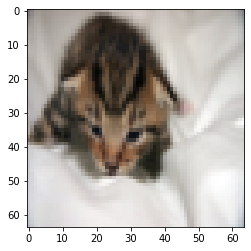

In [15]:
# Example of a picture that was wrongly classified.
index =1
plt.imshow(x_test[:,index].reshape((64, 64, 3)))
print ("y = " + str(y_test[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")

[144.86776074 122.16224801  97.59234956  78.58543519  69.27582747
  63.3840711   58.4948336   54.34880662  50.7746031   47.65288252
  44.89727838  42.44334184  40.24175393  38.25396764  36.44930623
  34.80297198  33.29464432  31.90747087  30.62732712  29.44226382]


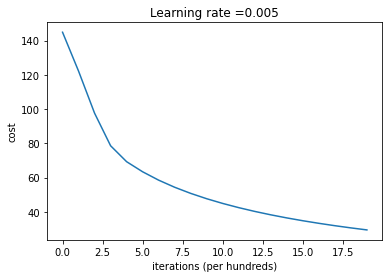

In [16]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
print(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()